<p><img alt="Colaboratory logo" height="50px" src="https://github.com/INGEOTEC/text_models/raw/master/docs/source/ingeotec.png" align="left" hspace="10px" vspace="0px" /></p>

<h1>Measuring Human Mobility through Twitter Data</h1>

### http://ingeotec.mx

### http://github.com/ingeotec

# Abstract

Twitter is perhaps the social media more amenable for research. It requires only a few steps to obtain information, and there are plenty of libraries that can help in this regard. Nonetheless, for a newcomer, knowing whether a particular event is expressed on Twitter is not an easy task that requires a considerable collection of tweets. The aim is to facilitate, a researcher interested in Twitter data, the process of mining Twitter to know whether a particular social event is expressed on the network. We present a library (written in Python) that retrieves a plethora of mobility information processed from Twitter (since December 11, 2015).

# Requirements and Auxiliary Functions

This section presents the steps to install the text_models library, and also the cartopy package. The latter is used to plot the maps; it is pertinent to comment that cartopy is not a compulsory requirement of text_models. At the end of the section, different auxiliary functions are implements; these are mainly used to create the plots; the idea is to write only the necessary code in the rest of the document.

## Install text_models

In [1]:
!pip install -U text_models

     |████████████████████████████████| 6.8MB 3.0MB/s 
     |████████████████████████████████| 32.2MB 139kB/s 
     |████████████████████████████████| 71kB 9.0MB/s 
     |████████████████████████████████| 61kB 7.5MB/s 
  Created wheel for EvoMSA: filename=EvoMSA-1.2.3-cp36-cp36m-linux_x86_64.whl size=32312294 sha256=bad986e7afac66cbaff297ce15c7c8b10b41da321d8269085953f6bac0221ead
  Stored in directory: /root/.cache/pip/wheels/52/e9/c2/bdf0fe82c89e63a0efdc288f88e4d158e6e0547d4618b331a3
  Created wheel for microtc: filename=microtc-2.2.5-cp36-none-any.whl size=56492 sha256=8e37fabb216ef910480793e669eb184d5455a95d40bfa09ac62ae5d3deb69512
  Stored in directory: /root/.cache/pip/wheels/a1/aa/9f/ae7ca326cfcbd08baf81bafcc774aaacf3d8710545fa2aabec
Successfully built EvoMSA microtc


## Install cartopy


In [2]:
# installing cartopy to create maps.
!apt-get install -qq libgdal-dev libproj-dev
!pip install cartopy

Extracting templates from packages: 100%
(Reading database ... 144429 files and directories currently installed.)
Preparing to unpack .../00-libsqlite3-0_3.22.0-1ubuntu0.3_amd64.deb ...
Unpacking libsqlite3-0:amd64 (3.22.0-1ubuntu0.3) over (3.22.0-1ubuntu0.1) ...
Selecting previously unselected package libmysqlclient-dev.
Preparing to unpack .../01-libmysqlclient-dev_5.7.30-0ubuntu0.18.04.1_amd64.deb ...
Unpacking libmysqlclient-dev (5.7.30-0ubuntu0.18.04.1) ...
Selecting previously unselected package default-libmysqlclient-dev:amd64.
Preparing to unpack .../02-default-libmysqlclient-dev_1.0.4_amd64.deb ...
Unpacking default-libmysqlclient-dev:amd64 (1.0.4) ...
Selecting previously unselected package libblas3:amd64.
Preparing to unpack .../03-libblas3_3.7.1-4ubuntu1_amd64.deb ...
Unpacking libblas3:amd64 (3.7.1-4ubuntu1) ...
Selecting previously unselected package libblas-dev:amd64.
Preparing to unpack .../04-libblas-dev_3.7.1-4ubuntu1_amd64.deb ...
Unpacking libblas-dev:amd64 (3.7.1-4

## Functions

In [0]:
def plot_mobility(data, percentage, codes, titles=dict(), shape=(3, 2)):
  import matplotlib.pyplot as plt
  # xticks data
  days = mobility.dates
  index = list(range(len(days) - 1, 0, -7))
  index.reverse()

  for img, code in enumerate(codes):
    ax1 = plt.subplot(shape[0], shape[1], img + 1)
    # xticks
    plt.xticks(index, ["%s-%02i-%02i" % (str(days[x].year)[-2:], days[x].month, days[x].day)
                      for x in index], rotation=90)
    # Overall mobility
    ax1.plot(data[code]) 
    # Legend
    ax1.legend(["Travels"], loc="lower left")
    # Title
    plt.title(titles.get(code, code))
    ax1.set_ylabel("Number of Travels")
    # grid
    plt.grid()
    ax2 = ax1.twinx()
    ax2.plot(percentage[code], color="g")
    ax2.set_ylabel("Percentage")
    ax2.legend(["Trend"])
  _ = plt.tight_layout()  

Function to aggregate outward travels from different days

In [0]:
from collections import defaultdict, Counter

def aggregate_outward_travels(days):
  counter = defaultdict(Counter)
  for day in days:
    for k, v in outward[day].items():
      counter[k].update(v)
  return counter

Create a color map using a list of origin-destination matrix.

In [0]:
from matplotlib import pyplot

def outward_cmap(origin, dests):
  values = list()
  [values.extend(list(dest[origin].values())) for dest in dests]
  values = np.unique(values)
  values.sort()
  _min, _max = values[0], values[-1]
  coef = np.linalg.solve([[_max, 1], [_min, 1]], [1, 0])
  cmap = pyplot.get_cmap('YlOrRd')(np.array(values) * coef[0] + coef[1])
  cmap = {k: v for k, v in zip(values, cmap)}
  return cmap

In [0]:
class Color(object):
  def __init__(self, dest, cmap, states, origin):
    self._dest = dest
    self._cmap = cmap
    self._states = states
    self._origin = origin
    self._C = 0

  def color(self, geometry):
    if self._C == len(mexico):
      self._C = 0
    state = self._states[self._C]
    self._C += 1
    if state == self._origin:
      return {'facecolor': 'blue', 'edgecolor': 'k'}
    value = self._dest[origin][state]
    if value == 0:
      return {'facecolor': 'w', 'edgecolor': 'k'}
    color = self._cmap[value]
    return {'facecolor': color, 'edgecolor': 'k'}

In [0]:
def plot_outward_mobility_map(color, ax, names):
  # ax.set_extent(extend, trans)
  ax.add_geometries([states._records[k].geometry for k in names], trans,
                     styler=color.color)
  # bounds
  lon_min = lat_min = np.inf
  lon_max = lat_max = -np.inf
  for m in mexico:
    a = states[m].bounds
    lon_min = min(a[0], a[2], lon_min)
    lon_max = max(a[0], a[2], lon_max)
    lat_min = min(a[1], a[3], lat_min)
    lat_max = max(a[1], a[3], lat_max)
  lon_min, lon_max, lat_min, lat_max
  ax.plot([lon_min, lon_max], [lat_min, lat_max], '.',
          transform=trans, color="w")  
  # ax.plot([-117.12776,  -86.811982388],[14.5388286402, 32.72083], '.',
  #         transform=trans, color="w")

## Load Mobility class

In [0]:
from text_models.place import Mobility

## Load BoundingBox class and cartopy.crs

In [0]:
from cartopy import crs
from text_models.place import BoundingBox

# Overall Mobility

Different measures can be used to represent the mobility of a particular region. The following figures present the movement using the number of travels and the mobility trend as a percentage of change between a baseline and a specific date. The number of trips is a measure that can be defined in terms of the number of outward, inward, or inside travels in the region of interest. **Overall mobility** refers to the inclusion of all directions in the measure, that is outward, inward, and inside travels. On the other hand, the percentage of change transforms a mobility measure into a rate by considering a baseline period using in both cases the same measure.

The functionality of the package is shown by presenting the overall mobility and the mobility trend of different regions that include countries and states. The period used correspond to the 15 weeks previous to the latest available day in the dataset.

In [0]:
mobility = Mobility(window=15 * 7)

In order to compute the mobility trend, it is needed a base period; here, this period corresponds to 10 weeks previous to the first day of the overall mobility.  

In [0]:
baseline = Mobility(day=mobility.dates[0], window=10 * 7)

## Mobility on Countries
The overall mobility on the available countries can be computed as follows:

In [0]:
overall_cntr = mobility.overall(mobility.country)

The first step in order to compute the mobility trend is to obtain the mobility of the regions of interest. In this case, this corresponds to the overall mobility in the base period. 

In [0]:
baseline_cntr = baseline.overall(baseline.country)

Once this information is obtained, it is used to compute the statistics needed to compute the percentage. A plausible approach that has been used on different research works is to compute the average of mobility per weekday. The following instruction obtains the mobility median per weekday on the different countries available.

In [0]:
percentage_cntr = baseline.weekday_percentage(baseline_cntr)

It is time to transform the overall mobility into a percentage using the baseline. 

In [0]:
perc_overall_cntr = mobility.transform(overall_cntr, percentage_cntr)

The following figure depicts the overall mobility and the mobility trend of Mexico, the United States, Spain, and Canada. Each figure contains two lines; the blue one corresponds to the overall mobility measured in the number of trips. The green one depicts the mobility trend in percentage. It can be observed that the range in the number of travels is different for each country. The United States has a peak in around 100,000 travels per day; meanwhile, the other countries are around 5000 trips.

On the other hand, the trend in all countries is to reduce mobility. There is a reduction in mobility of almost 40% in the United States and Canada, whereas the reduction is around 60% in Mexico and Spain. Also, it can be seen that the deepest slope is exhibited in Spain. 



Populating the interactive namespace from numpy and matplotlib


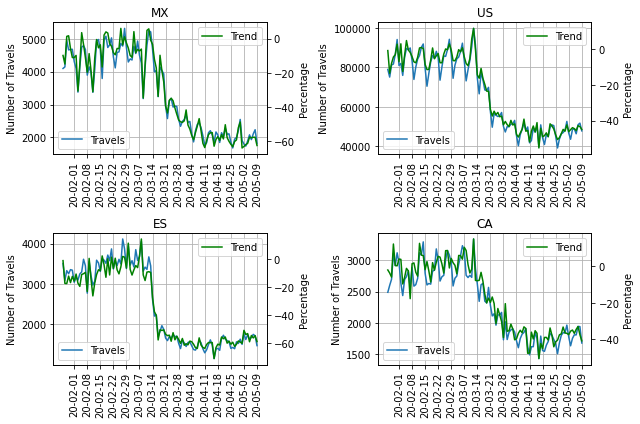

In [16]:
%pylab inline
# Size of the figure
figsize(9, 6)
plot_mobility(overall_cntr, perc_overall_cntr,
              ["MX", "US", "ES", "CA"], shape=(2, 2))

## Mobility on States or Provinces
In order to complement the analysis of countries' mobility, let us perform a study on the mobility per state (per province in the case of Canada). 
The algorithm is equivalent to the one used to compute countries' mobility. The only difference is in the aggregation function that groups the information by state instead of a country.

The aggregation function is changed on the overall mobility as well as in the baseline, as can be seen in the following instructions. 

In [0]:
overall_stt = mobility.overall(mobility.state)
baseline_stt = baseline.overall(baseline.state)

Once the base mobility is obtained, it is time to compute the statistics and used this information to transform the data into a percentage, as can be observed in the following code. 

In [0]:
percentage_stt = baseline.weekday_percentage(baseline_stt)
perc_overall_stt = mobility.transform(overall_stt, percentage_stt)

The figure presents the overall mobility and the mobility trend of Ontario (Canada), Mexico City (Mexico), New York (United States), and Baja California (Mexico). The notation is equivalent to the one used in the previous figures, that is, the blue line corresponds to overall mobility, whereas the green one is the trend in percentage. 

Populating the interactive namespace from numpy and matplotlib


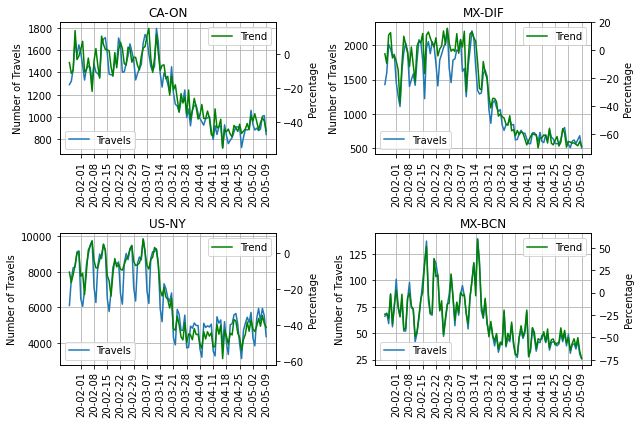

In [19]:
%pylab inline
# Size of the figure
figsize(9, 6)
plot_mobility(overall_stt, perc_overall_stt,
              ['CA-ON', 'MX-DIF', 'US-NY', 'MX-BCN'], shape=(2, 2))

## Mobility on Canada's Provinces

Let us try to produce the mobility graphs of the different provinces in Canada. The first step is to obtain, which are Canada's provinces, from the mobility data.



In [0]:
keys = np.unique([x for x in overall_stt if x[:2] == "CA"])

Having obtained Canada's provinces, we are in a position to plot their mobility. 

Populating the interactive namespace from numpy and matplotlib


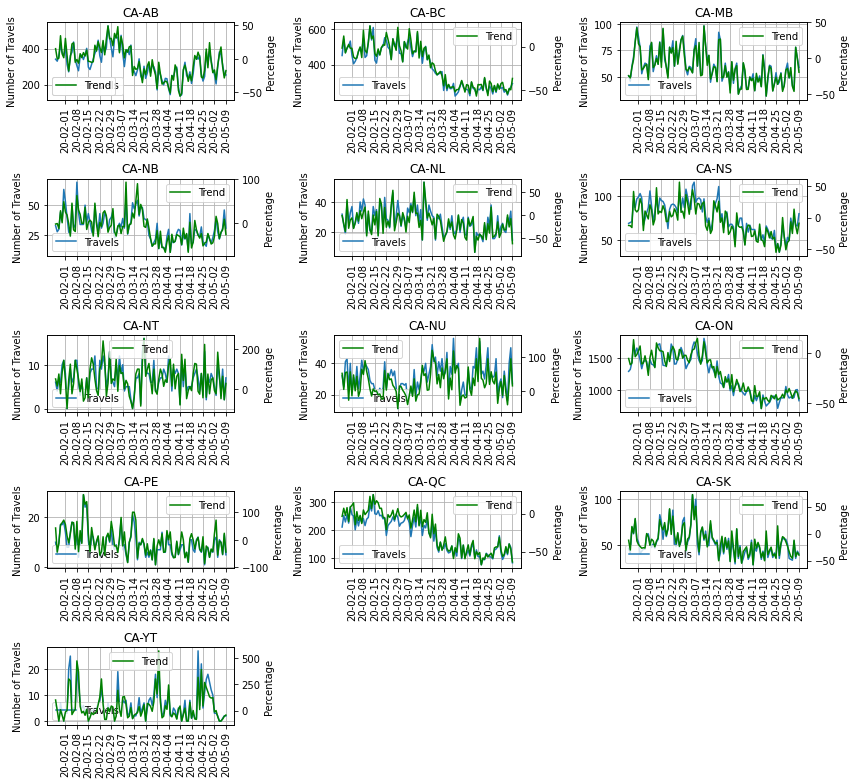

In [21]:
%pylab inline
figsize(12, 11)
plot_mobility(overall_stt, perc_overall_stt, keys, shape=(5, 3))

# Baseline Analysis
Mobility trend is calculated using a baseline; in the preceding figures, the baseline is the median of the number of travel per weekday on a base period. The following figure presents the median value for Mexico, The United States, and Canada per weekday. 

In [0]:
countries = ["MX", "US", "CA"]

The median per weekday of all countries is in a dictionary where the key corresponds to the country using a two-letter notation. For example, the data of Mexico can be found as:

In [23]:
percentage_cntr["MX"]

The information is encapsulated on the MobilityTransform class; the actual median values are in a dictionary, indexed by the day of the week, called *data*.

The magnitude of the number of travels per day varied within the countries; hence, it is not possible to plot them together unless the data is normalized. The normalization used is to transform the data to have zero mean and one standard deviation. 

The following code produces the plots of the median per day of the different countries considered, and as can be observed, the data is transformed just before being calling the *plot* function. 

Populating the interactive namespace from numpy and matplotlib


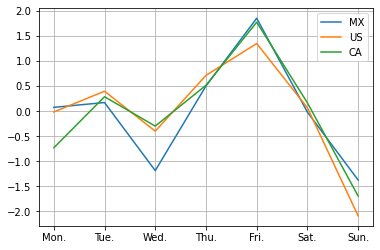

In [24]:
%pylab inline

for country in countries:
  data = percentage_cntr[country].data
  data = np.array([data[x] for x in range(7)]) 
  data = (data - data.mean()) / np.std(data)
  plot(data)
  grid()
_ = xticks(range(7), ["Mon.", "Tue.", "Wed.", "Thu.", "Fri.", "Sat.", "Sun."])
_ = legend(countries)

A characteristic that is common to all countries which can be observed from the figure is that Friday has the highest number of travels whereas the lowest number corresponds to Sunday. Then from Sunday to Friday, there is an increment in the number of travels. 

# Outward Mobility Map

So far, mobility has been presented as a function of the date number of travels or the mobility trend. However, there is another mobility feature that the previous figures do not allow to depict, which is that mobility is the displacement between two places. One way to represent the outward mobility is in a map where one region is the origin of the travels, and the other regions are the destination.
 
This section presents two mobility maps in Mexico's states. The idea is to depict the interaction between the states. The first one presents a static view of this interplay, and the second one is a dynamic view of the relationship between states in terms of mobility. 

The first step to create these maps is to compute the outward mobility in the region of interest. In this case, the region of interest is Mexico's states. 
The following code retrieves the mobility in Mexico's states, please note that the level function uses the state function only if the country, i.e., the two first letter of the bounding-box's label represent Mexico. 

In [0]:
country_code = "MX"
outward = mobility.outward(level=lambda x: mobility.state(x) if x[:2] == country_code and x != "MX:9662" else None)

The *outward* mobility is obtained per day, so this information can be used to create a map per day. The idea is to present only one map; one possible approach is to count all the travels between two points performed on different days. That is, the travel information can be aggregated to have an overall picture. 

In [0]:
dest = aggregate_outward_travels(range(len(outward)))

In order to create the mobility map using the information processed in the previous step, it is needed the geographic details of Mexico's states. The **States** class contains all the geographic details of all the states, including Mexico; in the next instruction, it is obtained the codes used in Mexico. 

In [27]:
from text_models.place import States
states = States()
mexico = [k for k in states.keys() if k[:2] == country_code]

/usr/local/lib/python3.6/dist-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/cultural/ne_10m_admin_1_states_provinces.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


The mobility map is an origin-destination map, so the first decision is to select the origin. In this example, let us decide that the origin is Michoacan.

In [0]:
origin = "MX-MIC"

Let us create a mobility map in which the origin is identified with the color blue, and the color of the destination depends on the number of travels. The second part is addressed by creating a color map (*outward_cmap* function) where white corresponds to states that do have any travel, yellow is the lowest number of travels, and red is the highest.

Once the color map is created, it is used on the **Color** class to associate the color with the state and then create the map. 

Populating the interactive namespace from numpy and matplotlib


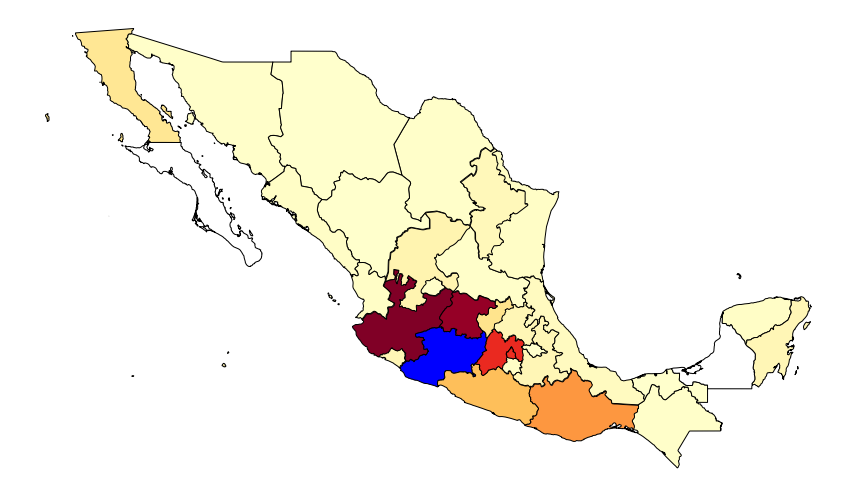

In [29]:
%pylab inline
figsize(12, 12)

trans = crs.PlateCarree()
cmap_data = outward_cmap(origin, [dest])
color = Color(dest, cmap_data, mexico, origin)
ax = subplot(1, 1, 1, projection=trans, frameon=False)
plot_outward_mobility_map(color, ax, mexico)  
plt.tight_layout()

From the figure, it is observed that the majority of outward travels occur to the states of Jalisco and Guanajuato, then at the same level are Mexico City and Mexico State. The north state that receives more travels from Michoacan is Baja California, which is coherent with the fact that there is a strong migration from Michoacan to the United States. 

## Evolution of outward mobility

Mobility is a dynamic phenomenon; in order to illustrate this characteristic, it was decided to create a series of mobility for different periods. 

The idea is to split the days in the **mobility** instance into nine periods without overlap. These periods are stored in a list that latter would be used to create the map.

In [0]:
index = list(range(len(mobility.dates)))
cnt = int(np.ceil(len(index) / 9))
dests = []
dates = []
while len(index):
  _ = [index.pop() for _ in range(cnt) if len(index)]
  dests.append(aggregate_outward_travels(_))
  last = mobility.dates[_[0]]
  first = mobility.dates[_[-1]]
  dates.append("%s%02i%02i-%s%02i%02i" % (str(first.year)[-2:], first.month, first.day,
                                          str(last.year)[-2:], last.month, last.day))
dests.reverse()
dates.reverse()

It is needed to decide the origin state to create the maps. In this example, Jalisco is used as the origin. 

In [0]:
origin = "MX-JAL"

The maps are created using a similar approach than the one used on the previous map. The significant difference is that there is a common color map created with all the information, and then there is a loop for the different travel information.

Populating the interactive namespace from numpy and matplotlib


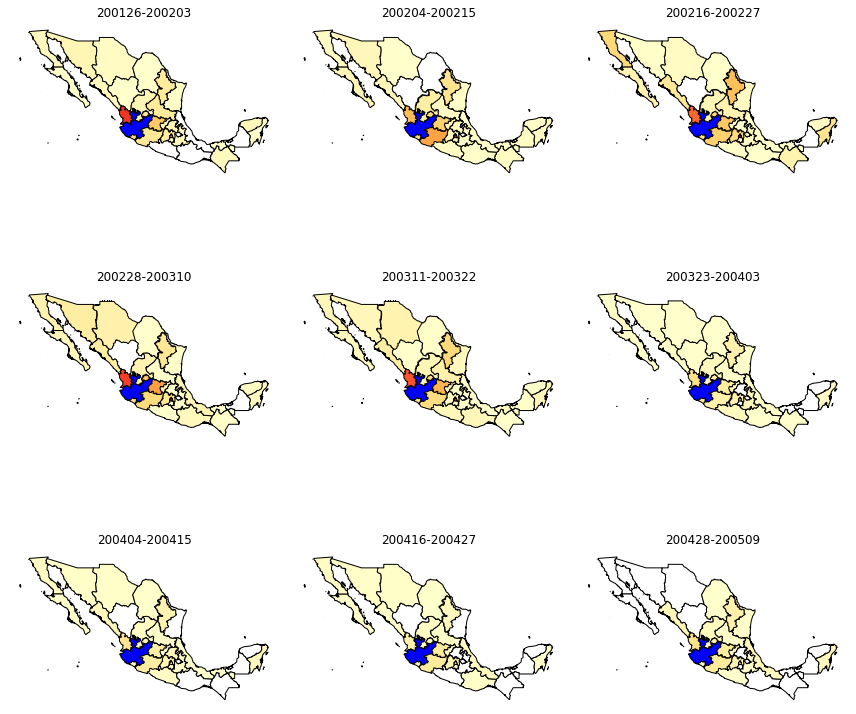

In [32]:
%pylab inline
figsize(12, 12)

trans = crs.PlateCarree()
cmap_data = outward_cmap(origin, dests)
for img, dest in enumerate(dests):
  # plt.clf()
  color = Color(dest, cmap_data, mexico, origin)
  ax = subplot(3, 3, img + 1, projection=trans, frameon=False)
  plot_outward_mobility_map(color, ax, mexico)  
  ax.set_title(dates[img])
plt.tight_layout()

# Mobility Algorithm

The origin-destination matrices are created per day using the information gathered from Twitter. The process can be divided into two stages. The first one was performed only once, and the second one is responsible for creating the dataset. 

The first step computes the set of geographic points that will provide the lowest resolution in the space. The idea is that each geo-tagged tweet will be associated with a point in this set. The set is a subset of the bounding-box centroids of all the tweets in the collection. The centroids kept appeared in more tweets than 1% of the number of days collected for the country having the centroid of interest. It is worth to mention that those geo-tagged tweets that provide a specific location are not considered in this process.  



The set of geographic points is depicted in the following figure, where all the points belonging to a country have the same color; the result is that the countries can be observed in the picture. 
The map is created following the next steps. The first one is to instantiate the class where the set is contained, this is, **BoundingBox** class.

In [0]:
bbox = BoundingBox()

The actual data is in a property called *bounding_box*, which is a dictionary where the keys are the country codes. The points, for each country, are a matrix where the first column is the latitude, and the second the longitude, all the values are stored in radians. 

All the points need to be projected into a coordinate reference system; this is performed using the **crs** package of **cartopy**, in particular the **PlateCarree** system is used.

Populating the interactive namespace from numpy and matplotlib


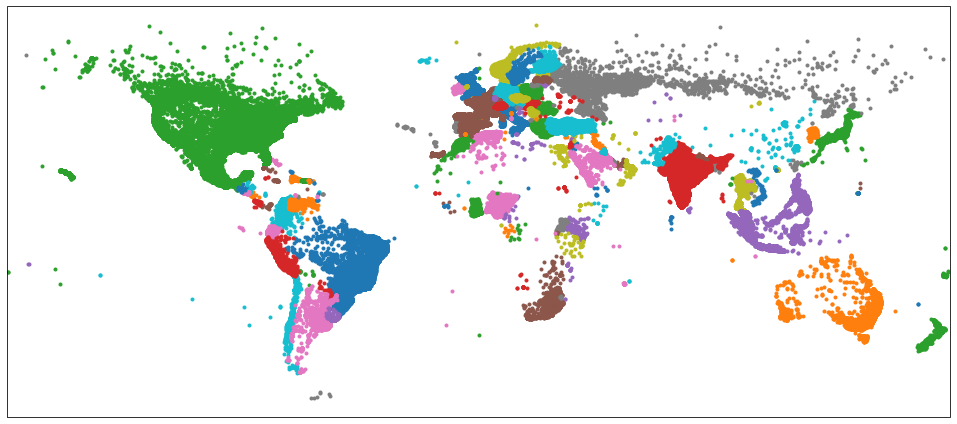

In [34]:
%pylab inline
figsize(16, 6)

trans = crs.PlateCarree()
ax = subplot(1, 1, 1, projection=trans)
for cntr, data in bbox.bounding_box.items():
  data = np.rad2deg(data)
  data = data[:, ::-1]
  _ = ax.plot(data[:, 0], data[:, 1], '.', transform=trans) 
plt.tight_layout()

The second step corresponds to the count of the trips between the elements of the set of geographic points, previously defined. Each component of the set is assigned an identifier, and then each geo-tagged tweet is associated with the identifier of the closest element of the geographic set. In the case the tweets localization is a bounding box, its centroid replaces the bounding box. Then the tweets are group by the user and sorted by time. Using this arrangement, the process iterates for all the tweets of a user; comparing the position of each tweet with the place of the following tweet; in the case, the length between the two locations is higher than 100 meters, then it is recorded one trip from the first tweet identifier to the second tweet identifier. This process continues for all the users that published in the day. A deficiency of this algorithm is that it does not consider trips that a dour at different days. However, this decision was taken to favor efficiency in terms of time - the algorithm can be run in parallel at the period of a day - and memory given that the number of user increase when one considers more days. 